# import

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
#from dtw import accelerated_dtw

# load data

In [8]:

property_data_path = r"C:\Users\User\Desktop\quant\Sector Allocation Framework under Reinforcement Learning Rotation\security_properties.parquet"
price_data_path = r"H:\我的雲端硬碟\DEV_INTERN_ALPHA_DATA-20240709T015049Z-001\DEV_INTERN_ALPHA_DATA\pmart.parquet"

In [3]:

#price_data = price_data[['datetime', 'symbol', '收盤價', '收盤價-除權息']]
#price_data = price_data[price_data['symbol'] == '5321']
#price_data
#price_data.columns

In [5]:
price_data = pd.read_parquet(price_data_path)[['datetime', 'symbol', '收盤價'] ]
price_data = price_data[price_data['symbol'] == '2610']
price_data.to_csv('cb_26107_stock.csv')
price_data

,datetime,symbol,收盤價
458,2013-05-15,2610,11.50
1911,2013-05-16,2610,11.40
3364,2013-05-17,2610,11.35
4817,2013-05-20,2610,11.40
6270,2013-05-21,2610,11.40
...,...,...,...
109541,2024-06-13,2610,22.85
111366,2024-06-14,2610,23.00
113191,2024-06-17,2610,22.95
115016,2024-06-18,2610,23.35


In [9]:
#price_data = pd.read_parquet(price_data_path)[['datetime', 'symbol', '收盤價'] ]
price_data = pd.read_parquet(price_data_path)[['datetime', 'symbol', '收盤價-除權息'] ]   #用收盤價-除權息
property_data = pd.read_parquet(property_data_path)

property_data

,目前狀態,TSE產業名,上市日,下市日,名稱(中文),市場別,證券種類代碼,證券種類名稱,industry,info
symbol,,,,,,,,,,
0001,2020-01-01,,1988-05-12,2005-05-31,野村鴻運基金,DIST,FUND,基金,None,None
000116,2020-01-01,金融業,1996-06-28,2002-02-05,日盛證券,DIST,STOCK,普通股,金融業,000116 | 日盛證券 | DIST | 金融業
0002,2020-01-01,,1988-06-28,1999-06-22,第一金福元,DIST,FUND,基金,None,None
0003,2020-01-01,,1988-07-12,1998-01-08,匯豐成長,DIST,FUND,基金,None,None
0004,2020-01-01,,1988-08-06,2000-06-21,兆豐國際國民,DIST,FUND,基金,None,None
...,...,...,...,...,...,...,...,...,...,...
T3707Y,2022-01-01,,NaT,2022-12-02,國泰科技生化,DIST,FUND,基金,None,None
T3714Y,2022-01-01,,NaT,2022-12-02,國泰小龍,DIST,FUND,基金,None,None
T3735Y,2020-01-01,,NaT,2019-06-18,國泰價值卓越,DIST,FUND,基金,None,None


In [10]:
property_data['industry'].unique()

array([None, '金融業', '建材營造', '食品工業', '管理股票', '觀光餐旅', '其他', '材料', '汽車工業',
       '電子零組件', '電腦及週邊', '居家生活', '電機機械', '生技醫療', '化學工業', '鋼鐵工業', '航運業',
       '半導體', '電子工業', '通信網路業', '光電業', '電子通路業', '資訊服務業', '油電燃氣業', '數位雲端',
       '觀光事業', '文化創意業', '綠能環保', '生物枓技業', '電子商務'], dtype=object)

In [11]:

price_data


,datetime,symbol,收盤價-除權息
0,2013-05-15,1101,17.2287
1,2013-05-15,1102,20.4095
2,2013-05-15,1103,8.7900
3,2013-05-15,1104,9.6952
4,2013-05-15,1108,4.5928
...,...,...,...
118196,2024-06-19,9951,70.7000
118197,2024-06-19,9955,31.5500
118198,2024-06-19,9958,341.5000
118199,2024-06-19,9960,27.2500


In [12]:
price_data['symbol'] = price_data['symbol'].astype(str)
property_data = property_data.reset_index()
property_data


,symbol,目前狀態,TSE產業名,上市日,下市日,名稱(中文),市場別,證券種類代碼,證券種類名稱,industry,info
0,0001,2020-01-01,,1988-05-12,2005-05-31,野村鴻運基金,DIST,FUND,基金,None,None
1,000116,2020-01-01,金融業,1996-06-28,2002-02-05,日盛證券,DIST,STOCK,普通股,金融業,000116 | 日盛證券 | DIST | 金融業
2,0002,2020-01-01,,1988-06-28,1999-06-22,第一金福元,DIST,FUND,基金,None,None
3,0003,2020-01-01,,1988-07-12,1998-01-08,匯豐成長,DIST,FUND,基金,None,None
4,0004,2020-01-01,,1988-08-06,2000-06-21,兆豐國際國民,DIST,FUND,基金,None,None
...,...,...,...,...,...,...,...,...,...,...,...
3587,T3707Y,2022-01-01,,NaT,2022-12-02,國泰科技生化,DIST,FUND,基金,None,None
3588,T3714Y,2022-01-01,,NaT,2022-12-02,國泰小龍,DIST,FUND,基金,None,None
3589,T3735Y,2020-01-01,,NaT,2019-06-18,國泰價值卓越,DIST,FUND,基金,None,None
3590,T4706Y,2020-01-01,,NaT,2018-07-27,台新主流,DIST,FUND,基金,None,None


In [13]:
# 過濾掉有下市日的資料
property_data = property_data[pd.isna(property_data['下市日'])]
property_data

,symbol,目前狀態,TSE產業名,上市日,下市日,名稱(中文),市場別,證券種類代碼,證券種類名稱,industry,info
33,0050,2024-01-01,,2003-06-30,NaT,元大台灣50,TSE,FUND,基金,None,None
34,0051,2024-01-01,,2006-08-31,NaT,元大中型100,TSE,FUND,基金,None,None
35,0052,2024-01-01,,2006-09-12,NaT,富邦科技,TSE,FUND,基金,None,None
36,0053,2024-01-01,,2007-07-16,NaT,元大電子,TSE,FUND,基金,None,None
38,0055,2024-01-01,,2007-07-16,NaT,元大MSCI金融,TSE,FUND,基金,None,None
...,...,...,...,...,...,...,...,...,...,...,...
3550,MSCI,2022-01-01,None,1988-01-05,NaT,摩根台股指數,TSE,None,None,None,None
3551,MSCIB,2024-01-01,None,NaT,NaT,MSCIB,,None,None,None,None
3565,T1001Y,2024-01-01,,NaT,NaT,富邦FB,OTC,FUND,基金,None,None
3566,T1010Y,2024-01-01,,NaT,NaT,精銳FB,OTC,FUND,基金,None,None


In [14]:
print(price_data['symbol'].unique())
print(property_data['symbol'].unique())

['1101' '1102' '1103' ... '6952' '6617' '6637']
['0050' '0051' '0052' ... 'T1001Y' 'T1010Y' 'T1012Y']


# weekly_return

In [15]:
# merge df
price_data_with_industry = pd.merge(price_data, property_data, left_on='symbol', right_on='symbol', how='left')
price_data_with_industry['datetime'] = pd.to_datetime(price_data_with_industry['datetime'])
price_data_with_industry['industry'] = price_data_with_industry['industry'].str.strip()
price_data_with_industry = price_data_with_industry[price_data_with_industry['symbol'] != '5364']# 去除因股價資料有誤

price_data_with_industry

,datetime,symbol,收盤價-除權息,目前狀態,TSE產業名,上市日,下市日,名稱(中文),市場別,證券種類代碼,證券種類名稱,industry,info
0,2013-05-15,1101,17.2287,2024-01-01,水泥工業,1962-02-09,NaT,台泥,TSE,STOCK,普通股,建材營造,1101 | 台泥 | TSE | 建材營造
1,2013-05-15,1102,20.4095,2024-01-01,水泥工業,1962-06-18,NaT,亞泥,TSE,STOCK,普通股,建材營造,1102 | 亞泥 | TSE | 建材營造
2,2013-05-15,1103,8.7900,2024-01-01,水泥工業,1969-11-27,NaT,嘉泥,TSE,STOCK,普通股,建材營造,1103 | 嘉泥 | TSE | 建材營造
3,2013-05-15,1104,9.6952,2024-01-01,水泥工業,1971-02-02,NaT,環泥,TSE,STOCK,普通股,建材營造,1104 | 環泥 | TSE | 建材營造
4,2013-05-15,1108,4.5928,2024-01-01,水泥工業,1990-06-06,NaT,幸福,TSE,STOCK,普通股,建材營造,1108 | 幸福 | TSE | 建材營造
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523861,2024-06-19,9951,70.7000,2024-01-01,電機機械,2003-12-18,NaT,皇田,OTC,STOCK,普通股,電機機械,9951 | 皇田 | OTC | 電機機械
4523862,2024-06-19,9955,31.5500,2024-01-01,綠能環保,2003-12-30,NaT,佳龍,TSE,STOCK,普通股,綠能環保,9955 | 佳龍 | TSE | 綠能環保
4523863,2024-06-19,9958,341.5000,2024-01-01,鋼鐵工業,2008-03-12,NaT,世紀鋼,TSE,STOCK,普通股,鋼鐵工業,9958 | 世紀鋼 | TSE | 鋼鐵工業
4523864,2024-06-19,9960,27.2500,2024-01-01,運動休閒,2004-12-06,NaT,邁達康,OTC,STOCK,普通股,居家生活,9960 | 邁達康 | OTC | 居家生活


In [16]:
price_data_with_industry.to_csv('close_with_industry.csv')

In [12]:
price_data_with_industry_grouped = price_data_with_industry.groupby(['industry'])

In [13]:
sector_dfs = {} # 用於儲存各產業的報酬率DF


for sector_name, group in price_data_with_industry_grouped:

    industry_name = group['industry'].iloc[0]
    # 設定 datetime 為索引
    sector_df = group.set_index('datetime')[['symbol', '收盤價-除權息']]
    
    # 計算每個 symbol 的周報酬率（以 5 天為一週）
    sector_df['weekly_return'] = sector_df.groupby('symbol')['收盤價-除權息'].pct_change(periods=5)
    
    # 去除包含 NaN 值的行，確保數據完整
    sector_df = sector_df.dropna()

    # 使用 pivot 將 symbol 作為欄位名稱，datetime 作為索引，收盤價 作為值
    sector_pivot = sector_df.reset_index().pivot(index="datetime", columns="symbol", values="weekly_return")
    
    # 將每個產業的 DataFrame 存入字典，以 sector_name 作為鍵
    sector_dfs[industry_name] = sector_pivot

C:\Users\User\AppData\Local\Temp\ipykernel_15592\4161057623.py:11: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sector_df['weekly_return'] = sector_df.groupby('symbol')['收盤價-除權息'].pct_change(periods=5)
C:\Users\User\AppData\Local\Temp\ipykernel_15592\4161057623.py:11: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sector_df['weekly_return'] = sector_df.groupby('symbol')['收盤價-除權息'].pct_change(periods=5)
C:\Users\User\AppData\Local\Temp\ipykernel_15592\4161057623.py:11: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in

In [14]:
for sector_name, df in sector_dfs.items():
    # 每 5 行保留第一行
    sector_dfs[sector_name] = df.iloc[::5]

for sector_name, df in sector_dfs.items():
    # 計算每行平均值，忽略 NaN
    df['weekly_return_mean'] = df.mean(axis=1, skipna=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15592\2801013290.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekly_return_mean'] = df.mean(axis=1, skipna=True)


# 檢查異常值

In [15]:
# 檢查觀光餐旅業
sector_dfs['數位雲端'].sort_values(by='weekly_return_mean', ascending=False)[0:1]


symbol,2640,2949,3085,3130,3687,5278,5287,5321,6165,6689,...,6763,6811,6865,6870,6906,8044,8454,8472,8477,weekly_return_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-27,0.084297,NaN,-0.049999,0.073642,0.338297,0.043525,0.010811,0.275006,0.257426,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.100464,0.060465,0.159924,0.108374


In [16]:
# 檢查觀光餐旅業
price_data[price_data['symbol'] == '5321'][130:160]

,datetime,symbol,收盤價-除權息
190860,2013-11-19,5321,14.1421
192329,2013-11-20,5321,14.1421
193799,2013-11-21,5321,14.1421
195270,2013-11-22,5321,14.1421
196743,2013-11-25,5321,14.6441
198217,2013-11-26,5321,14.6441
199696,2013-11-27,5321,13.6330
201175,2013-11-28,5321,12.6916
202655,2013-11-29,5321,11.0180
204135,2013-12-02,5321,11.0180


In [17]:
sector_return_df = pd.DataFrame()
for sector_name, df in sector_dfs.items():
    # 將每個產業的平均報酬率合併
    sector_return_df[sector_name] = df['weekly_return_mean']

sector_return_df

,光電業,其他,化學工業,半導體,居家生活,建材營造,數位雲端,文化創意業,材料,汽車工業,...,觀光餐旅,資訊服務業,通信網路業,金融業,鋼鐵工業,電子通路業,電子零組件,電機機械,電腦及週邊,食品工業
datetime,,,,,,,,,,,,,,,,,,,,,
2013-05-22,0.076711,0.021258,0.006285,0.029453,0.029403,0.035108,0.097801,0.019457,0.020763,0.024767,...,0.019078,0.028848,0.022083,0.028258,0.026185,0.041874,0.034240,0.023174,0.029762,0.033710
2013-05-29,0.001892,0.003983,0.000813,0.003443,0.004875,0.003362,0.056084,0.024891,0.004664,0.015721,...,-0.006231,0.023339,0.003004,-0.010884,0.010590,0.000107,0.003062,0.010621,0.005743,0.013325
2013-06-05,0.001344,0.005505,-0.000251,0.002354,0.019047,0.022704,0.035149,-0.016564,-0.004564,0.000825,...,-0.018731,0.010346,-0.004086,-0.007915,-0.007952,-0.000266,-0.005270,-0.003669,0.004273,0.003483
2013-06-13,-0.052111,-0.022663,-0.011599,-0.047093,-0.019819,-0.029413,-0.027210,-0.025924,-0.011819,-0.030346,...,-0.014164,0.017006,-0.032391,-0.006229,-0.014272,-0.014895,-0.028386,-0.021952,-0.032365,-0.018387
2013-06-20,-0.007445,0.008745,0.018480,0.005438,0.000333,-0.015432,-0.000821,-0.016688,0.008465,-0.013938,...,-0.001873,0.044164,-0.001975,-0.009522,-0.006132,-0.007296,0.001010,0.006422,0.009225,0.002924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-21,0.033222,0.006831,0.002612,0.016581,-0.000365,0.028659,0.019725,0.009023,0.006075,0.026140,...,0.001460,0.013854,0.021684,0.017653,0.023827,0.039995,0.023779,0.011471,0.029995,0.020556
2024-05-28,0.033575,0.005347,0.004317,0.046760,-0.002653,-0.015558,0.011243,0.002525,0.001873,0.011768,...,0.010422,0.016564,0.044173,0.000724,-0.009262,0.036353,0.030936,0.025737,0.053148,-0.007067
2024-06-04,-0.004807,0.003521,-0.001138,-0.000591,0.008363,0.052269,-0.003722,0.021293,-0.007581,-0.002662,...,-0.023981,0.021536,0.003525,-0.008406,-0.011110,0.017806,0.004073,0.018689,0.012005,0.009244


In [18]:
sector_return_df['觀光餐旅'][20:40]

datetime
2013-10-15   -0.017069
2013-10-22   -0.000588
2013-10-29   -0.004035
2013-11-05   -0.011946
2013-11-12   -0.014902
2013-11-19    0.022512
2013-11-26    0.014911
2013-12-03    0.056765
2013-12-10    0.013230
2013-12-17    0.004775
2013-12-24    0.026359
2013-12-31    0.011052
2014-01-08   -0.014302
2014-01-15    0.001333
2014-01-22   -0.010459
2014-02-06   -0.006868
2014-02-13    0.012537
2014-02-20    0.029052
2014-02-27    0.010910
2014-03-07    0.014550
Name: 觀光餐旅, dtype: float64

In [31]:
sector_return_df.to_csv('sector_return.csv')

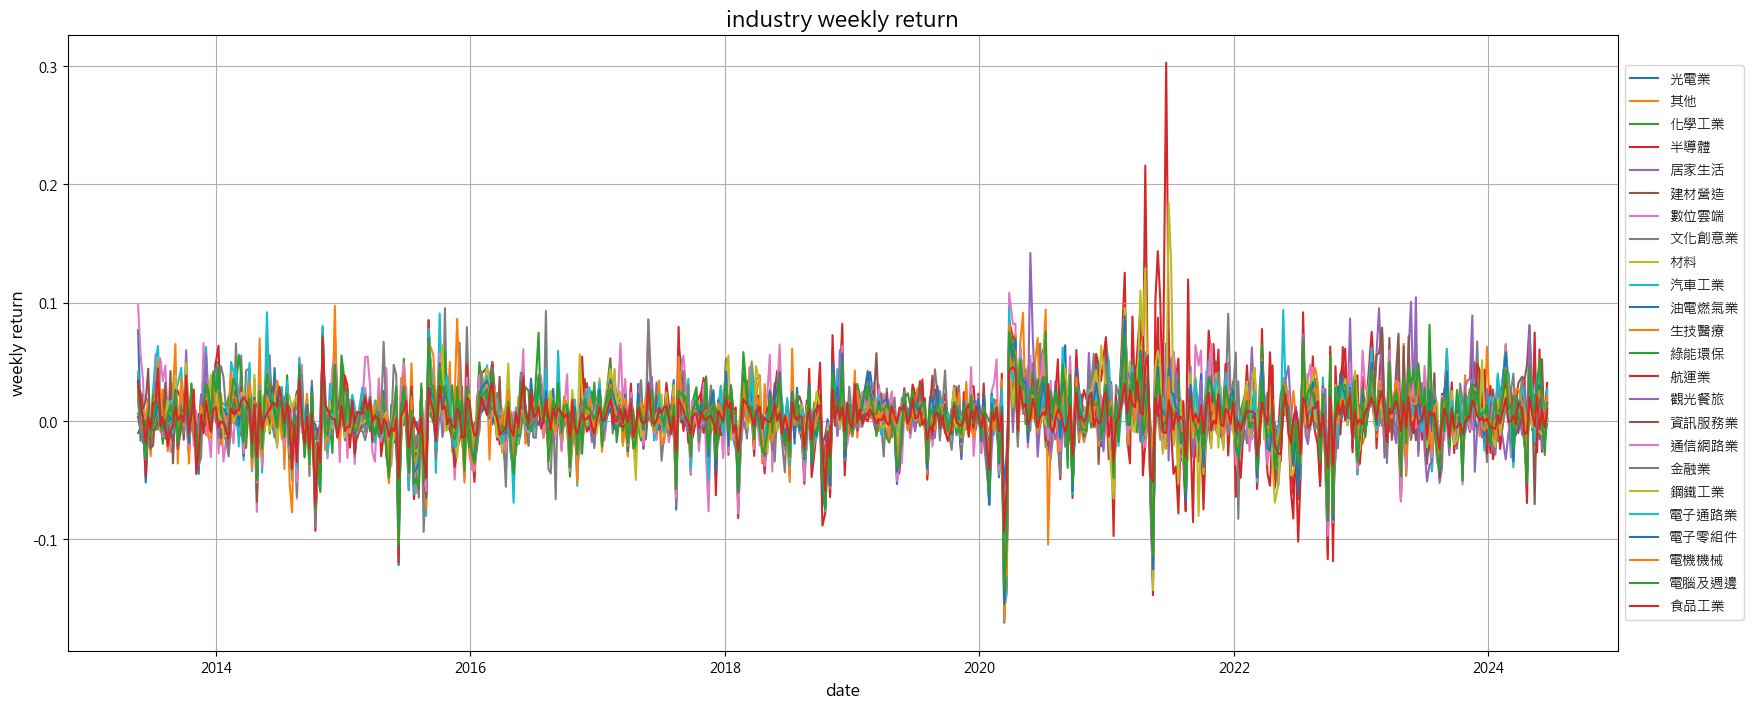

In [20]:
"""畫周報酬"""

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號

# 創建折線圖
plt.figure(figsize=(20, 8))  # 設定圖表大小

# 遍歷每個產業（即每列），並繪製不同的折線
for column in sector_return_df.columns:
    plt.plot(sector_return_df.index, sector_return_df[column], label=column)  # 使用每列的數據繪製曲線

# 添加圖表標題和軸標籤
plt.title("industry weekly return", fontsize=16)  # 圖表標題
plt.xlabel("date", fontsize=12)  # X軸標籤
plt.ylabel("weekly return", fontsize=12)  # Y軸標籤

# 將圖例放置在圖表外
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# 添加網格
plt.grid(True)  # 開啟網格線

# 顯示圖表
plt.show()

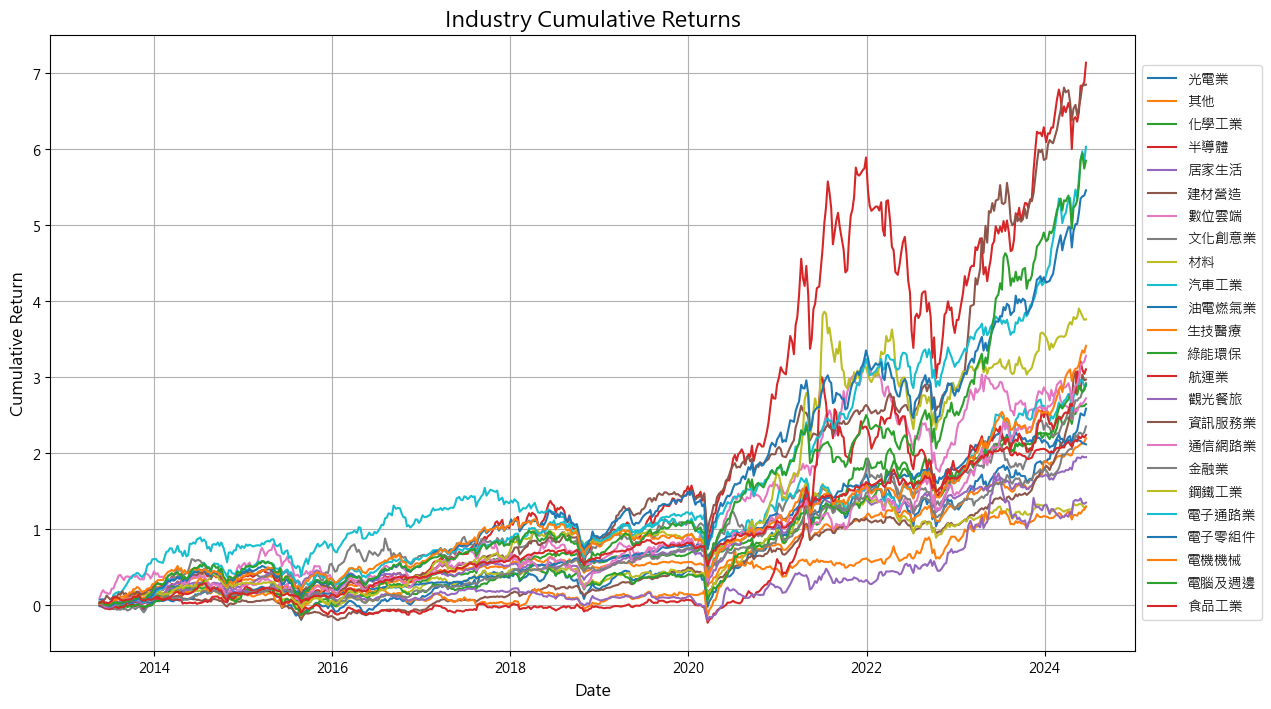

In [21]:
"""畫累積周報酬"""

# 修改中文字體和負號顯示設定
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False  # 顯示負號

# 計算累積收益 (cumulative returns)
cumulative_returns = (1 + sector_return_df).cumprod() - 1  # 假設sector_return_df是百分比形式的回報率

# 創建累積收益折線圖
plt.figure(figsize=(14, 8))  # 設定圖表大小

# 遍歷每個產業（即每列），並繪製累積收益曲線
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)  # 使用累積收益數據繪製曲線

# 添加圖表標題和軸標籤
plt.title("Industry Cumulative Returns", fontsize=16)  # 圖表標題
plt.xlabel("Date", fontsize=12)  # X軸標籤
plt.ylabel("Cumulative Return", fontsize=12)  # Y軸標籤

# 將圖例放置在圖表外
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# 添加網格
plt.grid(True)  # 開啟網格線

# 顯示圖表
plt.show()


# summary statistic

In [22]:
# 計算統計摘要
summary_statistics = sector_return_df.describe().T  # 使用 describe() 並轉置

# 保存到文件或直接顯示
summary_statistics.to_csv("summary_statistics.csv")  # 將摘要保存為 CSV 文件
summary_statistics = summary_statistics.dropna()
summary_statistics.sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
航運業,543.0,0.003126,0.032867,-0.147288,-0.009693,0.001221,0.015356,0.302867
鋼鐵工業,543.0,0.003220,0.026311,-0.143005,-0.008890,0.002486,0.015298,0.184121
觀光餐旅,543.0,0.001879,0.024786,-0.103363,-0.010102,0.000962,0.011835,0.142029
半導體,543.0,0.004471,0.034503,-0.156867,-0.011210,0.006562,0.024087,0.125338
數位雲端,543.0,0.002854,0.029271,-0.162428,-0.013902,0.001996,0.019977,0.108374
生技醫療,543.0,0.001936,0.028164,-0.169186,-0.011308,0.001965,0.015842,0.099519
綠能環保,543.0,0.002775,0.022831,-0.122561,-0.008752,0.003015,0.014894,0.097335
汽車工業,543.0,0.002898,0.027971,-0.157192,-0.009471,0.004115,0.017727,0.095364
文化創意業,543.0,0.002910,0.027872,-0.147637,-0.012437,0.003804,0.017329,0.095313
電子零組件,543.0,0.003779,0.025780,-0.154744,-0.007114,0.006500,0.018080,0.088484


# correlation

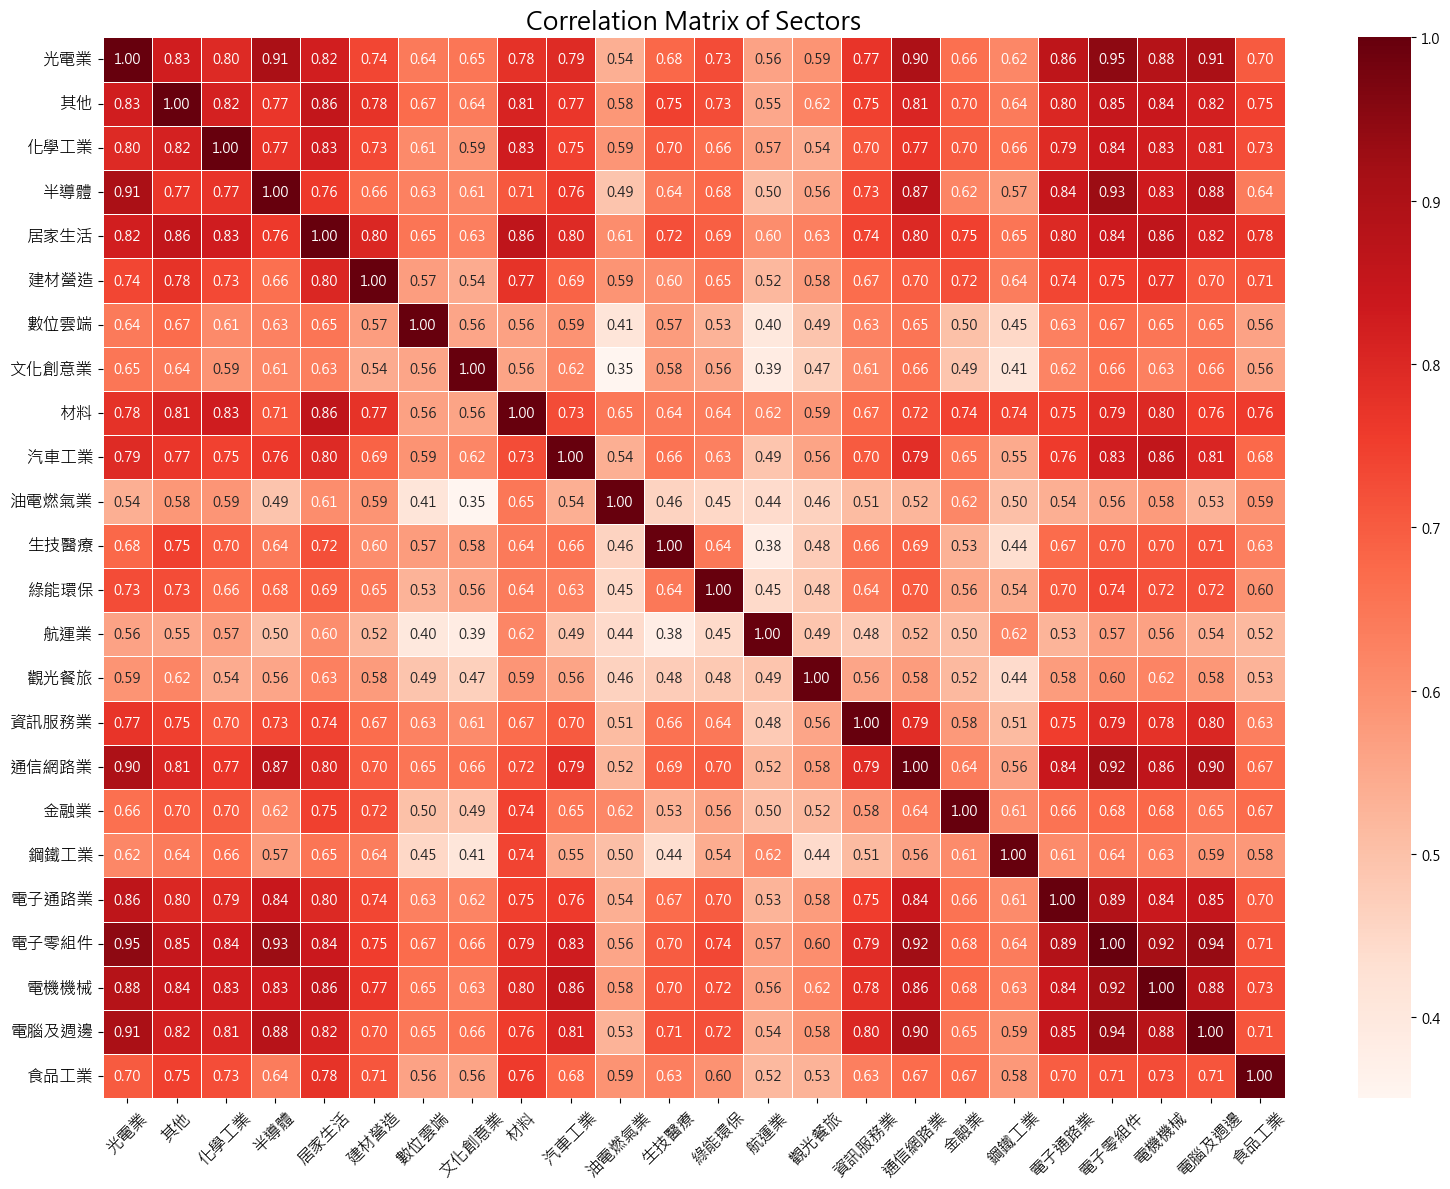

In [23]:
# 計算相關性矩陣
correlation_matrix = sector_return_df.corr()

plt.figure(figsize=(16, 12))  
sns.heatmap(
    correlation_matrix,
    annot=True,       # 在每個格子中顯示數字
    fmt=".2f",        # 數字格式
    cmap="Reds",      # 配色方案
    cbar=True,        # 是否顯示顏色條
    linewidths=0.5    # 增加格子之間的線條分隔
)
plt.title("Correlation Matrix of Sectors", fontsize=18)  # 更大的標題字體
plt.xticks(rotation=45, fontsize=12)  # X軸標籤旋轉並增加字體大小
plt.yticks(rotation=0, fontsize=12)   # Y軸標籤保持水平並增加字體大小
plt.tight_layout()  # 自動調整佈局避免標籤被截斷
plt.show()

# check extreme value

In [24]:
check_df = price_data_with_industry.copy()
check_df= check_df[check_df['industry'] == '觀光餐旅']

check_df

,datetime,symbol,收盤價-除權息,目前狀態,TSE產業名,上市日,下市日,名稱(中文),市場別,證券種類代碼,證券種類名稱,industry,info
28,2013-05-15,1259,54.3306,2024-01-01,觀光餐旅,2011-12-15,NaT,安心,OTC,STOCK,普通股,觀光餐旅,1259 | 安心 | OTC | 觀光餐旅
470,2013-05-15,2701,9.0773,2024-01-01,觀光餐旅,1965-03-22,NaT,萬企,TSE,STOCK,普通股,觀光餐旅,2701 | 萬企 | TSE | 觀光餐旅
471,2013-05-15,2702,9.5035,2024-01-01,觀光餐旅,1965-06-01,NaT,華園,TSE,STOCK,普通股,觀光餐旅,2702 | 華園 | TSE | 觀光餐旅
472,2013-05-15,2704,25.0382,2024-01-01,觀光餐旅,1982-11-10,NaT,國賓,TSE,STOCK,普通股,觀光餐旅,2704 | 國賓 | TSE | 觀光餐旅
473,2013-05-15,2705,24.8736,2024-01-01,觀光餐旅,1988-12-24,NaT,六福,TSE,STOCK,普通股,觀光餐旅,2705 | 六福 | TSE | 觀光餐旅
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523259,2024-06-19,5706,77.2000,2024-01-01,觀光餐旅,2001-11-30,NaT,鳳凰,TSE,STOCK,普通股,觀光餐旅,5706 | 鳳凰 | TSE | 觀光餐旅
4523268,2024-06-19,5905,14.2000,2024-01-01,觀光餐旅,2003-06-17,NaT,南仁湖,OTC,STOCK,普通股,觀光餐旅,5905 | 南仁湖 | OTC | 觀光餐旅
4523691,2024-06-19,8077,63.0000,2024-01-01,觀光餐旅,2004-12-06,NaT,洛碁,OTC,STOCK,普通股,觀光餐旅,8077 | 洛碁 | OTC | 觀光餐旅
4523819,2024-06-19,8940,26.0500,2024-01-01,觀光餐旅,2003-01-17,NaT,新天地,TSE,STOCK,普通股,觀光餐旅,8940 | 新天地 | TSE | 觀光餐旅


In [25]:
# 設定 datetime 為索引
check_df = group.set_index('datetime')[['symbol', '收盤價-除權息']]
    
# 計算每個 symbol 的周報酬率（以 5 天為一週）
check_df['weekly_return'] = check_df.groupby('symbol')['收盤價-除權息'].pct_change(periods=5)
    
# 去除包含 NaN 值的行，確保數據完整
check_df = check_df.dropna()

# 使用 pivot 將 symbol 作為欄位名稱，datetime 作為索引，收盤價 作為值
check_pivot = check_df.reset_index().pivot(index="datetime", columns="symbol", values="weekly_return")
check_pivot

C:\Users\User\AppData\Local\Temp\ipykernel_15592\1103736954.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  check_df['weekly_return'] = check_df.groupby('symbol')['收盤價-除權息'].pct_change(periods=5)


symbol,1201,1203,1210,1213,1215,1216,1217,1218,1219,1220,...,1256,1264,1702,1737,1796,3054,4205,4207,6578,6846
datetime,,,,,,,,,,,,,,,,,,,,,
2013-05-22,0.045406,0.021326,0.013593,0.004116,0.022570,0.018455,0.018953,-0.019738,-0.003311,0.023474,...,0.344873,NaN,0.041011,-0.044070,NaN,0.271182,0.019658,-0.008724,NaN,NaN
2013-05-23,0.019190,0.007075,-0.007713,-0.002073,-0.006365,0.016722,0.009522,-0.013282,0.000000,0.023474,...,0.344957,NaN,0.018749,-0.038131,NaN,0.137566,0.012284,0.002966,NaN,NaN
2013-05-24,0.020833,0.009478,-0.022900,-0.012246,-0.012609,0.001663,-0.014220,-0.023176,-0.003311,0.023364,...,0.344587,NaN,-0.013976,-0.026180,NaN,0.019806,-0.009731,-0.020405,NaN,NaN
2013-05-27,0.060166,0.011820,-0.009495,0.004116,-0.003129,0.000000,0.004766,-0.009996,0.000000,0.018697,...,0.343851,NaN,-0.015382,-0.007043,NaN,0.000000,-0.015680,-0.011758,NaN,NaN
2013-05-28,0.045361,-0.009216,-0.013334,0.010245,0.003159,-0.014852,0.000000,-0.003340,0.000000,-0.009094,...,0.342828,NaN,0.001547,-0.007118,NaN,-0.011627,-0.014493,-0.011700,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-13,-0.002653,-0.019000,-0.006981,0.002786,0.009302,0.017610,0.004149,-0.017660,0.000000,-0.009740,...,0.002506,0.009646,-0.015517,0.000000,-0.045886,-0.007389,-0.008457,-0.040872,-0.020408,0.022576
2024-06-14,0.000000,-0.001005,-0.003497,-0.004178,0.023364,0.017435,0.008299,-0.011136,0.002660,0.009901,...,0.017766,0.016077,-0.003454,-0.002946,-0.052133,-0.004963,-0.007407,-0.030303,0.014134,0.002621
2024-06-17,-0.002660,-0.004024,0.003503,0.000000,0.004630,0.017435,0.012397,-0.036559,0.005291,-0.006472,...,-0.002494,0.011200,-0.005181,-0.004418,-0.042789,-0.014742,-0.006349,-0.024725,0.003503,0.025000


In [26]:
# 每 5 行保留第一行
check_pivot = check_pivot.iloc[::5]

check_pivot['weekly_return_mean'] = check_pivot.mean(axis=1, skipna=True)

check_pivot.sort_values(by='weekly_return_mean', ascending=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15592\1198250797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_pivot['weekly_return_mean'] = check_pivot.mean(axis=1, skipna=True)


symbol,1201,1203,1210,1213,1215,1216,1217,1218,1219,1220,...,1264,1702,1737,1796,3054,4205,4207,6578,6846,weekly_return_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-13,-0.138891,-0.050000,-0.101122,-0.115260,-0.118315,-0.061899,-0.237927,-0.193486,-0.016481,-0.071089,...,-0.053738,-0.146939,-0.074882,-0.030360,0.012605,-0.108570,-0.091696,-0.133332,NaN,-0.093784
2014-10-13,-0.197260,-0.042195,-0.050254,-0.010611,-0.051084,-0.075527,-0.079620,-0.072879,-0.084589,-0.000998,...,NaN,-0.074702,-0.036293,NaN,-0.127490,-0.010281,-0.073354,NaN,NaN,-0.070503
2018-10-16,-0.062350,-0.025543,-0.069157,-0.118367,-0.042003,-0.029139,-0.058260,-0.107147,0.010990,-0.012495,...,-0.032020,-0.118863,-0.026060,-0.066667,0.004367,0.002949,-0.036294,-0.162659,NaN,-0.059088
2020-03-20,-0.086022,-0.003897,-0.050001,-0.069725,-0.036764,-0.046920,0.154487,-0.080764,-0.022344,-0.040817,...,-0.059260,-0.093302,-0.064081,-0.197653,-0.049793,-0.057692,0.054625,-0.153845,NaN,-0.055142
2021-05-14,-0.084784,-0.045642,-0.047298,-0.034130,-0.003798,-0.005362,0.012996,-0.024709,-0.112620,-0.135212,...,0.000000,-0.087188,-0.041853,-0.070421,-0.063380,-0.025532,-0.065220,-0.115473,NaN,-0.051599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-07,0.110803,0.009597,0.055556,0.003509,0.077758,0.076442,0.014694,0.095235,0.008382,0.054813,...,0.017857,0.056461,0.015624,0.007748,0.000000,0.025576,0.059079,0.085492,NaN,0.045594
2021-04-22,0.086168,0.014531,0.024778,-0.033333,0.037037,0.039673,0.284361,0.100000,0.022726,0.130003,...,0.069395,0.126790,0.023530,0.007352,-0.015730,0.018100,0.067167,0.036616,NaN,0.045980
2021-04-29,0.025054,-0.049477,0.034544,-0.026696,0.014030,-0.011843,0.069960,-0.003032,0.259999,0.115040,...,0.026622,0.052631,-0.015805,0.051095,0.041096,0.088889,0.083920,0.004413,NaN,0.055515


In [27]:
print(max(check_pivot['weekly_return_mean']))

0.0699650819160445


# 相位差

In [29]:
cumulative_returns = (1 + sector_return_df).cumprod()  # 累積收益率
cumulative_returns


,光電業,其他,化學工業,半導體,居家生活,建材營造,數位雲端,文化創意業,材料,汽車工業,...,觀光餐旅,資訊服務業,通信網路業,金融業,鋼鐵工業,電子通路業,電子零組件,電機機械,電腦及週邊,食品工業
datetime,,,,,,,,,,,,,,,,,,,,,
2013-05-22,1.076711,1.021258,1.006285,1.029453,1.029403,1.035108,1.097801,1.019457,1.020763,1.024767,...,1.019078,1.028848,1.022083,1.028258,1.026185,1.041874,1.034240,1.023174,1.029762,1.033710
2013-05-29,1.078748,1.025325,1.007103,1.032997,1.034421,1.038589,1.159370,1.044832,1.025524,1.040878,...,1.012728,1.052860,1.025153,1.017066,1.037053,1.041985,1.037407,1.034041,1.035676,1.047484
2013-06-05,1.080198,1.030970,1.006850,1.035430,1.054123,1.062169,1.200121,1.027525,1.020843,1.041737,...,0.993758,1.063753,1.020964,1.009016,1.028806,1.041708,1.031940,1.030247,1.040102,1.051132
2013-06-13,1.023908,1.007605,0.995171,0.986668,1.033231,1.030927,1.167466,1.000887,1.008778,1.010124,...,0.979683,1.081843,0.987894,1.002731,1.014123,1.026192,1.002647,1.007630,1.006439,1.031805
2013-06-20,1.016285,1.016416,1.013562,0.992033,1.033575,1.015018,1.166508,0.984184,1.017318,0.996046,...,0.977847,1.129621,0.985943,0.993183,1.007904,1.018705,1.003659,1.014101,1.015724,1.034822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-21,3.410398,3.101599,3.605867,7.483824,2.941925,3.893907,3.617950,3.724596,2.330472,3.919726,...,2.381378,7.545101,3.990681,3.267537,4.902842,6.608012,6.159528,4.165038,6.514794,3.220735
2024-05-28,3.524901,3.118183,3.621434,7.833767,2.934121,3.833328,3.658628,3.734000,2.334837,3.965853,...,2.406196,7.670076,4.166961,3.269903,4.857432,6.848236,6.350078,4.272234,6.861042,3.197974
2024-06-04,3.507955,3.129162,3.617312,7.829133,2.958659,4.033690,3.645010,3.813507,2.317136,3.955296,...,2.348492,7.835258,4.181649,3.242415,4.803466,6.970173,6.375940,4.352078,6.943410,3.227535
